In [1]:
from keras.applications.vgg16 import VGG16
from keras_vggface.vggface import VGGFace
import tensorflow as tf
import numpy as np

face_model = VGGFace(model='vgg16', 
                weights='vggface',
                input_shape=(224,224,3)) 
face_model.summary()

Using TensorFlow backend.


Model: "vggface_vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 224, 224, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 224, 224, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 112, 112, 64)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 112, 112, 128)     147584    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 56, 56, 128)     

In [2]:
for layer in face_model.layers:
    layer.trainable = False

In [3]:
from keras.models import Model, Sequential
from keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation

person_count = 5

last_layer = face_model.get_layer('pool5').output

x = Flatten(name='flatten')(last_layer)
x = Dense(1024, activation='relu', name='fc6')(x)
x = Dense(1024, activation='relu', name='fc7')(x)
out = Dense(person_count, activation='softmax', name='fc8')(x)

custom_face = Model(face_model.input, out)

In [4]:
custom_face.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 224, 224, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 224, 224, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 112, 112, 64)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 112, 112, 128)     147584    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 56, 56, 128)       0   

In [5]:
from keras.preprocessing.image import ImageDataGenerator
batch_size = 5
train_path = 'faces'
eval_path = 'eval_face'


In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
                        train_path,
                        target_size=(224,224),
                        batch_size=batch_size,
                        class_mode='sparse',
                        color_mode='rgb')

valid_generator = valid_datagen.flow_from_directory(
    directory=eval_path,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=True,
)

Found 50 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


In [7]:
from keras.optimizers import SGD

custom_face.compile(loss='sparse_categorical_crossentropy',
                         optimizer=SGD(lr=1e-4, momentum=0.9),
                         metrics=['accuracy'])

history = custom_face.fit_generator(
        train_generator,
        validation_data=valid_generator,
        steps_per_epoch=49/batch_size,
        validation_steps=valid_generator.n,
        epochs=50)


Epoch 1/50
10/9 [==============================] - 8s 849ms/step - loss: 1.6049 - accuracy: 0.1800 - val_loss: 1.6709 - val_accuracy: 0.1800
Epoch 2/50
10/9 [==============================] - 6s 588ms/step - loss: 1.6102 - accuracy: 0.1600 - val_loss: 1.5971 - val_accuracy: 0.2000
Epoch 3/50
10/9 [==============================] - 6s 572ms/step - loss: 1.6046 - accuracy: 0.1800 - val_loss: 1.6145 - val_accuracy: 0.2080
Epoch 4/50
10/9 [==============================] - 6s 567ms/step - loss: 1.6044 - accuracy: 0.2200 - val_loss: 1.6085 - val_accuracy: 0.2400
Epoch 5/50
10/9 [==============================] - 6s 587ms/step - loss: 1.6066 - accuracy: 0.2200 - val_loss: 1.6217 - val_accuracy: 0.2600
Epoch 6/50
10/9 [==============================] - 6s 577ms/step - loss: 1.6021 - accuracy: 0.2600 - val_loss: 1.5516 - val_accuracy: 0.2880
Epoch 7/50
10/9 [==============================] - 6s 582ms/step - loss: 1.5927 - accuracy: 0.3200 - val_loss: 1.5917 - val_accuracy: 0.2720
Epoch 8/50
10

In [8]:
custom_face.evaluate_generator(generator=valid_generator)
        
custom_face.save('h5 or xml files/vgg_face.h5')

In [11]:
from keras.models import Model, load_model
from keras.preprocessing.image import image, img_to_array
from keras_vggface import utils

model = load_model('h5 or xml files/vgg_face.h5')

img = 'test.jpg'

test_img = image.load_img(img, target_size=(224, 224))
img_test = img_to_array(test_img)
img_test = np.expand_dims(img_test, axis=0)
x = utils.preprocess_input(img_test, version=1)



<strong> now I pulled a pic that was not in the training folder for a better result Iam using matplotlib to display the image then putting it in the algorithim</strong>

AxesImage(54,36;334.8x217.44)


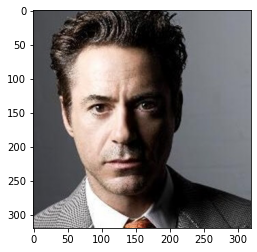

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg0
dis = mpimg.imread(img)
print(plt.imshow(dis))

In [12]:
predictions = model.predict(x)
predicted_class=np.argmax(predictions,axis=1)

<strong>Assignining the number of classes to the labels varabile
the first line of the output is the prediction while the seceond is the correct answer.</strong>

In [14]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class]
print(predictions)
['Robert D Jr']

['Robert Downey Jr']


['Robert D Jr']